In [13]:

# !pip install git+https://github.com/pycaret/pycaret.git@master --upgrade
!pip install pycaret[full] --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 85.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 3.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 3.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of umap-learn to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dash[testing] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dash[testing] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of 

In [1]:
from pycaret.datasets import get_data
# Do multiclass classification on Iris dataset
data = get_data('jewellery')
data.shape

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


(505, 4)

In [3]:
from pycaret.clustering import *

s = setup(
    data=data,
    session_id=123,
    normalize=True,
    use_gpu=False
)

,Description,Value
0,Session id,123
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [4]:
# List available models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [10]:
# Train a K-Means clustering model
kmeans = create_model('kmeans', num_clusters = 5)
print(kmeans)



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8049,3671.3580,0.2762,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KMeans(n_clusters=5, random_state=123)


In [11]:
# Assign Cluster Labels

clustered_result = assign_model(kmeans)
print("Cluster labels:", clustered_result['Cluster'].unique())
clustered_result.head()


Cluster labels: ['Cluster 1' 'Cluster 2' 'Cluster 4' 'Cluster 0' 'Cluster 3']


,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.830078,Cluster 1
1,59,81799,0.791082,5417.661621,Cluster 1
2,62,74751,0.702657,9258.993164,Cluster 1
3,59,74373,0.765680,7346.334473,Cluster 1
4,87,17760,0.348778,16869.507812,Cluster 2


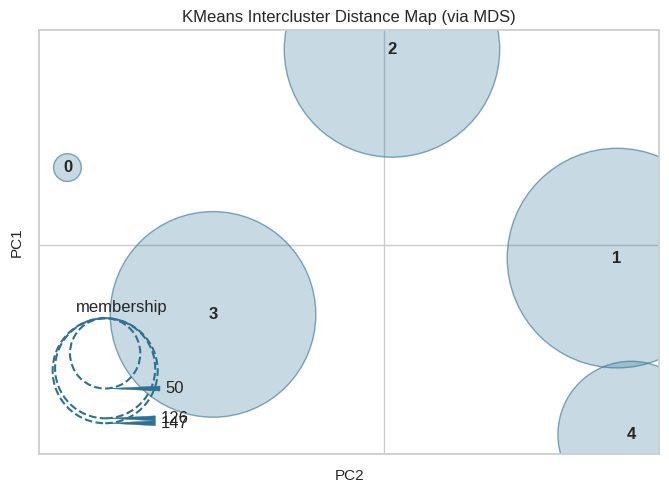

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [13]:
#  Analyze Model
# ==========================================
plot_model(kmeans, plot = 'distance')
plot_model(kmeans, plot = 'distribution')
plot_model(kmeans, plot='cluster')

# Interactive evaluation dashboard (optional)
evaluate_model(kmeans)


In [14]:
# Save and Load Model

save_model(kmeans, 'kmeans')
loaded_model = load_model('kmeans')


Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


In [15]:
# Predict on test Data

new_data = data.sample(10, random_state=42)
preds = predict_model(loaded_model, data=new_data)
preds


,Age,Income,SpendingScore,Savings,Cluster
173,56,68463,0.815712,8995.179688,Cluster 1
274,43,101641,0.381984,14424.097656,Cluster 3
490,84,36463,0.353621,16563.373047,Cluster 2
72,83,34529,0.317208,16517.208984,Cluster 2
305,25,130361,0.925439,4691.552246,Cluster 4
76,33,98033,0.309511,15774.690430,Cluster 3
476,33,106757,0.258396,14431.652344,Cluster 3
140,85,34634,0.369000,16719.816406,Cluster 2
470,58,70676,0.764028,7664.415527,Cluster 1
499,25,128625,0.816739,4914.117188,Cluster 4
